In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
import seaborn as sns
import requests
import json
from nba_api.stats.static import players

In [30]:
data = pd.read_csv('shot_logs.csv')
data_copy = data.copy()
data.head()

GAME_ID                   MATCHUP LOCATION  W  FINAL_MARGIN  SHOT_NUMBER  \
0  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            1   
1  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            2   
2  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            3   
3  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            4   
4  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            5   

   PERIOD GAME_CLOCK  SHOT_CLOCK  DRIBBLES  ...  SHOT_DIST  PTS_TYPE  \
0       1       1:09        10.8         2  ...        7.7         2   
1       1       0:14         3.4         0  ...       28.2         3   
2       1       0:00         NaN         3  ...       10.1         2   
3       2      11:47        10.3         2  ...       17.2         2   
4       2      10:34        10.9         2  ...        3.7         2   

   SHOT_RESULT   CLOSEST_DEFENDER CLOSEST_DEFENDER_PLAYER_ID  CLOSE_DEF_DIST  \
0         made     Anderson, Alan                     101187             1.3   
1       missed  Bogdanovic, Bojan                     202711             6.1   
2       missed  Bogdanovic, Bojan                     202711             0.9   
3       missed      Brown, Markel                     203900             3.4   
4       missed    Young, Thaddeus                     201152             1.1   

   FGM  PTS    player_name player_id  
0    1    2  brian roberts    203148  
1    0    0  brian roberts    203148  
2    0    0  brian roberts    203148  
3    0    0  brian roberts    203148  
4    0    0  brian roberts    203148  

[5 rows x 21 columns]

In [31]:
# Data Preprocessing

In [32]:
data.columns = data.columns.str.lower()

In [33]:
data.shape

(128069, 21)

In [34]:
data.columns

Index(['game_id', 'matchup', 'location', 'w', 'final_margin', 'shot_number',
       'period', 'game_clock', 'shot_clock', 'dribbles', 'touch_time',
       'shot_dist', 'pts_type', 'shot_result', 'closest_defender',
       'closest_defender_player_id', 'close_def_dist', 'fgm', 'pts',
       'player_name', 'player_id'],
      dtype='object')

In [35]:
data.dtypes

game_id                         int64
matchup                        object
location                       object
w                              object
final_margin                    int64
shot_number                     int64
period                          int64
game_clock                     object
shot_clock                    float64
dribbles                        int64
touch_time                    float64
shot_dist                     float64
pts_type                        int64
shot_result                    object
closest_defender               object
closest_defender_player_id      int64
close_def_dist                float64
fgm                             int64
pts                             int64
player_name                    object
player_id                       int64
dtype: object

In [36]:
# check missing values
data.isnull().sum()

game_id                          0
matchup                          0
location                         0
w                                0
final_margin                     0
shot_number                      0
period                           0
game_clock                       0
shot_clock                    5567
dribbles                         0
touch_time                       0
shot_dist                        0
pts_type                         0
shot_result                      0
closest_defender                 0
closest_defender_player_id       0
close_def_dist                   0
fgm                              0
pts                              0
player_name                      0
player_id                        0
dtype: int64

In [37]:
# replace null values in shot_clock with mean
data.shot_clock = data.shot_clock.fillna(data.shot_clock.mean())

In [38]:
# check missing values again
data.isnull().sum()

game_id                       0
matchup                       0
location                      0
w                             0
final_margin                  0
shot_number                   0
period                        0
game_clock                    0
shot_clock                    0
dribbles                      0
touch_time                    0
shot_dist                     0
pts_type                      0
shot_result                   0
closest_defender              0
closest_defender_player_id    0
close_def_dist                0
fgm                           0
pts                           0
player_name                   0
player_id                     0
dtype: int64

In [39]:
data.describe()

game_id   final_margin    shot_number         period  \
count  1.280690e+05  128069.000000  128069.000000  128069.000000   
mean   2.140045e+07       0.208723       6.506899       2.469427   
std    2.578773e+02      13.233267       4.713260       1.139919   
min    2.140000e+07     -53.000000       1.000000       1.000000   
25%    2.140023e+07      -8.000000       3.000000       1.000000   
50%    2.140045e+07       1.000000       5.000000       2.000000   
75%    2.140067e+07       9.000000       9.000000       3.000000   
max    2.140091e+07      53.000000      38.000000       7.000000   

          shot_clock       dribbles     touch_time      shot_dist  \
count  128069.000000  128069.000000  128069.000000  128069.000000   
mean       12.453344       2.023355       2.765901      13.571504   
std         5.636611       3.477760       3.043682       8.888964   
min         0.000000       0.000000    -163.600000       0.000000   
25%         8.400000       0.000000       0.900000       4.700000   
50%        12.453344       1.000000       1.600000      13.700000   
75%        16.400000       2.000000       3.700000      22.500000   
max        24.000000      32.000000      24.900000      47.200000   

            pts_type  closest_defender_player_id  close_def_dist  \
count  128069.000000               128069.000000   128069.000000   
mean        2.264670               159038.487284        4.123015   
std         0.441159                78791.172947        2.756446   
min         2.000000                  708.000000        0.000000   
25%         2.000000               101249.000000        2.300000   
50%         2.000000               201949.000000        3.700000   
75%         3.000000               203079.000000        5.300000   
max         3.000000               530027.000000       53.200000   

                 fgm            pts      player_id  
count  128069.000000  128069.000000  128069.000000  
mean        0.452139       0.997314  157238.251247  
std         0.497706       1.130978   79362.389336  
min         0.000000       0.000000     708.000000  
25%         0.000000       0.000000  101162.000000  
50%         0.000000       0.000000  201939.000000  
75%         1.000000       2.000000  202704.000000  
max         1.000000       3.000000  204060.000000

In [40]:
# count the number of negative values in touch_time
len(data.touch_time[data.touch_time<0])

312

In [41]:
# replace negative values in touch_time with mean
data.loc[(data.touch_time <0),'touch_time']=data.touch_time.mean()

In [42]:
len(data.touch_time[data.touch_time<0])

0

In [43]:
# check how many matches recorded in the dataset
# probably not the entrie season as there should be 30*82/2 = 1230 matches
# 30 teams, each plays 82 games, first half and second matches
data['game_id'].nunique()

904

In [44]:
# covert from categorical to nominal
data.location = data.location.map({"H":1,"A":0})
data.w = data.w.map({"W":1,"L":0})
data.pts_type = data.pts_type.map({3:1,2:0})
data.shot_result = data.shot_result.map({"made":1,"missed":0})

In [45]:
# change the column names to reflect the nominal values
data = data.rename(columns={"location":"home_away",'w':'win',"pts_type":"three_pts_shot"})
data.columns

Index(['game_id', 'matchup', 'home_away', 'win', 'final_margin', 'shot_number',
       'period', 'game_clock', 'shot_clock', 'dribbles', 'touch_time',
       'shot_dist', 'three_pts_shot', 'shot_result', 'closest_defender',
       'closest_defender_player_id', 'close_def_dist', 'fgm', 'pts',
       'player_name', 'player_id'],
      dtype='object')

In [46]:
data.head()

game_id                   matchup  home_away  win  final_margin  \
0  21400899  MAR 04, 2015 - CHA @ BKN          0    1            24   
1  21400899  MAR 04, 2015 - CHA @ BKN          0    1            24   
2  21400899  MAR 04, 2015 - CHA @ BKN          0    1            24   
3  21400899  MAR 04, 2015 - CHA @ BKN          0    1            24   
4  21400899  MAR 04, 2015 - CHA @ BKN          0    1            24   

   shot_number  period game_clock  shot_clock  dribbles  ...  shot_dist  \
0            1       1       1:09   10.800000         2  ...        7.7   
1            2       1       0:14    3.400000         0  ...       28.2   
2            3       1       0:00   12.453344         3  ...       10.1   
3            4       2      11:47   10.300000         2  ...       17.2   
4            5       2      10:34   10.900000         2  ...        3.7   

   three_pts_shot  shot_result   closest_defender closest_defender_player_id  \
0               0            1     Anderson, Alan                     101187   
1               1            0  Bogdanovic, Bojan                     202711   
2               0            0  Bogdanovic, Bojan                     202711   
3               0            0      Brown, Markel                     203900   
4               0            0    Young, Thaddeus                     201152   

   close_def_dist  fgm  pts    player_name player_id  
0             1.3    1    2  brian roberts    203148  
1             6.1    0    0  brian roberts    203148  
2             0.9    0    0  brian roberts    203148  
3             3.4    0    0  brian roberts    203148  
4             1.1    0    0  brian roberts    203148  

[5 rows x 21 columns]

In [47]:
data.dtypes

game_id                         int64
matchup                        object
home_away                       int64
win                             int64
final_margin                    int64
shot_number                     int64
period                          int64
game_clock                     object
shot_clock                    float64
dribbles                        int64
touch_time                    float64
shot_dist                     float64
three_pts_shot                  int64
shot_result                     int64
closest_defender               object
closest_defender_player_id      int64
close_def_dist                float64
fgm                             int64
pts                             int64
player_name                    object
player_id                       int64
dtype: object

In [48]:
# Exploratory Data Analysis

In [49]:
# home win rate
# check the home advantage in nba
home = data.loc[(data['home_away'] == 1)]

win_count = home.groupby('win')['win'].count()
win_count

win
0    27978
1    35956
Name: win, dtype: int64

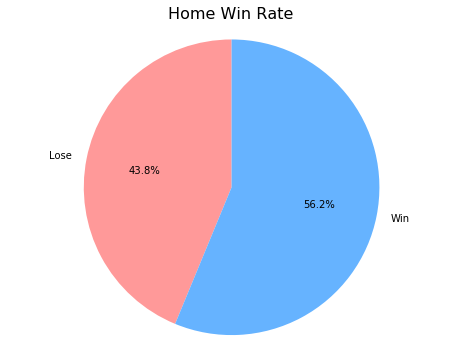

In [50]:
win_types = ['Lose', 'Win']

plt.figure(figsize=[8, 6]);
plt.pie(win_count, labels=win_types, autopct='%1.1f%%', shadow=False, startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Home Win Rate', fontsize=16);
plt.axis('equal');
plt.savefig('Home Win Rate.png')

In [51]:
# number of shots vs hitting percetage
# the top 10 player with the highest number of shots
shot_by_times = data.groupby('player_name', as_index=False) \
                            .agg(shot_times = ('shot_result', 'count'), \
                                 hit_pct = ('shot_result', 'mean'))\
                            .round(2).sort_values(by="shot_times", ascending=False)
shot_by_times.loc[shot_by_times.shot_times > 100].head(10)

player_name  shot_times  hit_pct
108       james harden        1054     0.45
198         mnta ellis        1052     0.45
167  lamarcus aldridge        1050     0.45
57      damian lillard         986     0.43
171       lebron james         978     0.49
157      klay thompson         971     0.46
236  russell westbrook         969     0.44
247      stephen curry         968     0.49
166       kyrie irving         942     0.47
269       tyreke evans         914     0.43

In [52]:
# the top 10 players with the highest number of hitting percentagept
shot_by_pct = data.groupby('player_name', as_index=False) \
                            .agg(shot_times = ('shot_result', 'count'), \
                                 hit_pct = ('shot_result', 'mean'))\
                            .round(2).sort_values(by="hit_pct", ascending=False)
shot_by_pct.loc[shot_by_pct.shot_times > 100].head(10)

player_name  shot_times  hit_pct
66   deandre jordan         393     0.71
270  tyson chandler         340     0.68
235     rudy gobert         267     0.63
109   james johnson         311     0.61
8     alexis ajinca         211     0.60
82         ed davis         350     0.60
188   mason plumlee         403     0.59
11     amir johnson         402     0.58
132     john henson         241     0.58
45   chris andersen         136     0.58

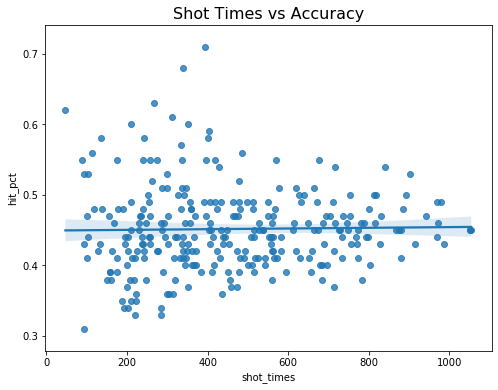

In [53]:
# number of shots vs hitting percetage
# no significant relationship between hic_pct and shot_times
# shooting more does not reduce the accuracy in general
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

sns.regplot(x='shot_times', y='hit_pct', data=shot_by_pct)
plt.title('Shot Times vs Accuracy', fontsize=16);
plt.savefig('Shot Times vs Accuracy.png')

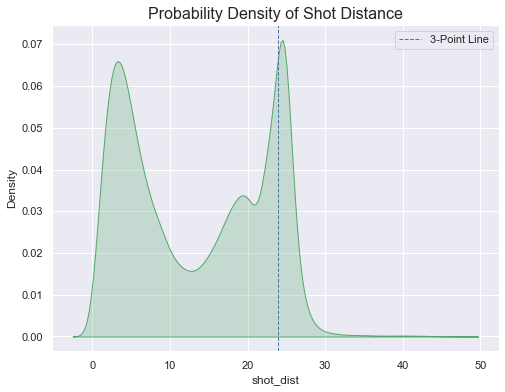

In [59]:
# density of shot_dist
# tactics-related, most players choose shooting at either short range or long range (for 3pts)
# mid range is not first choice to shoot
sns.set()
plt.figure(figsize=[8, 6]);
plt.axvline(x=23.9, linestyle='--',linewidth=1, color='b', label='3-Point Line');
plt.legend()
sns.kdeplot(data.shot_dist, shade=True, color='g')
plt.title('Probability Density of Shot Distance', fontsize=16);
plt.savefig('Probability Density of Shot Distance.png')

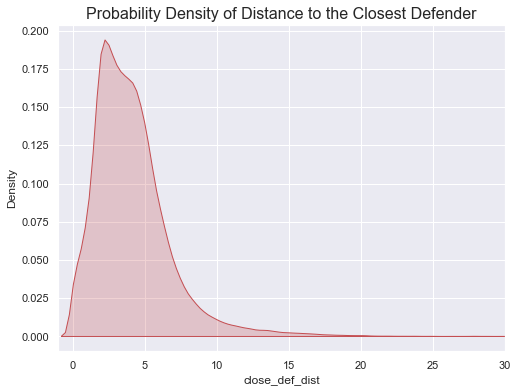

In [60]:
# density of close_def_dist
# meaning that within 5-foot, the defender could be a threat to the shooter
plt.figure(figsize=[8, 6]);
close_def_dist_plot = sns.kdeplot(data.close_def_dist, shade=True, color='r')
close_def_dist_plot.set(xlim=(-1,30))
plt.title('Probability Density of Distance to the Closest Defender', fontsize=16);
plt.savefig('Probability Density of Distance to the Closest Defender.png')

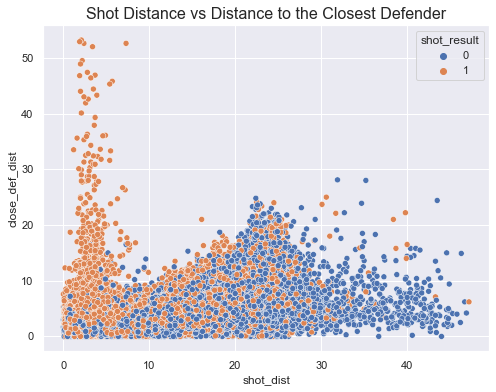

In [61]:
# shot_dist vs close_def_dist
# shorter shooting distance has higher accuracy,
# even though the shooter will face more challenges from the defender

fig, ax1 = plt.subplots(1, 1, figsize=(8, 6));
sns.scatterplot(x='shot_dist', y='close_def_dist', hue='shot_result', data=data)
plt.title('Shot Distance vs Distance to the Closest Defender', fontsize=16);
plt.savefig('Shot Distance vs Distance to the Closest Defender.png')

In [62]:
# accuracies of 3-point shot and 2-point shot
three_pts = data.loc[(data['three_pts_shot'] == 1)]

three_pts_hit = three_pts.groupby('shot_result')['shot_result'].count()
three_pts_hit

shot_result
0    21981
1    11915
Name: shot_result, dtype: int64

In [63]:
two_pts = data.loc[(data['three_pts_shot'] == 0)]

two_pts_hit = two_pts.groupby('shot_result')['shot_result'].count()
two_pts_hit

shot_result
0    48183
1    45990
Name: shot_result, dtype: int64

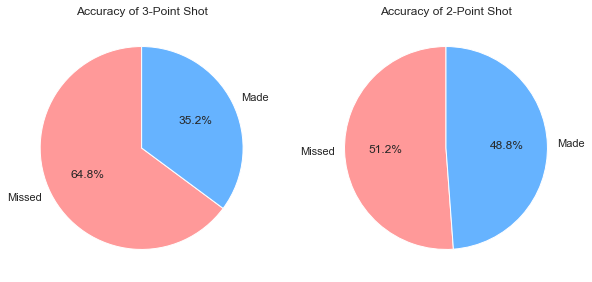

In [64]:
hit_types = ['Missed', 'Made']

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) #ax1,ax2 refer to the pie charts

# 1,2 = 1 row, 2 columns
#plot first pie
ax1.pie(three_pts_hit, labels=hit_types, autopct='%1.1f%%', shadow=False, startangle=90, colors=['#ff9999', '#66b3ff'])
ax1.set_title('Accuracy of 3-Point Shot')

# plot second pie
ax2.pie(two_pts_hit, labels=hit_types, autopct='%1.1f%%', shadow=False, startangle=90, colors=['#ff9999', '#66b3ff'])
ax2.set_title('Accuracy of 2-Point Shot')

plt.savefig('Accuracies of 3-Point Shot and 2-Point Shot.png')

In [65]:
# expected value of 3-point shot
three_point_ev = 0.352*3
three_point_ev

1.056

In [66]:
# expected value of 2-point shot
two_point_ev = 0.488*2
two_point_ev

0.976

In [67]:
# expected_value vs shot_dist
hit_rate = data.groupby(['shot_dist', 'three_pts_shot',], as_index=False) \
                           .agg(hit_pct = ('shot_result', 'mean'),\
                                shot_times = ('shot_result', 'count'))\
                            .round(2).sort_values(by="shot_dist", ascending=True)
hit_rate

shot_dist  three_pts_shot  hit_pct  shot_times
0          0.0               0     0.50           4
1          0.1               0     0.56          59
2          0.2               0     0.64         100
3          0.3               0     0.68         164
4          0.4               0     0.65         206
..         ...             ...      ...         ...
612       46.2               1     0.00           1
613       46.3               1     0.00           1
614       46.7               1     0.00           1
615       46.9               1     0.00           1
616       47.2               1     1.00           1

[617 rows x 4 columns]

In [68]:
hit_rate.three_pts_shot = hit_rate.three_pts_shot.map({0:2,1:3})
hit_rate = hit_rate.rename(columns={"three_pts_shot":"pts_type"})

In [69]:
hit_rate.head()

shot_dist  pts_type  hit_pct  shot_times
0        0.0         2     0.50           4
1        0.1         2     0.56          59
2        0.2         2     0.64         100
3        0.3         2     0.68         164
4        0.4         2     0.65         206

In [70]:
hit_rate["expected_value"] = hit_rate["pts_type"] * hit_rate["hit_pct"]
hit_rate.head()

shot_dist  pts_type  hit_pct  shot_times  expected_value
0        0.0         2     0.50           4            1.00
1        0.1         2     0.56          59            1.12
2        0.2         2     0.64         100            1.28
3        0.3         2     0.68         164            1.36
4        0.4         2     0.65         206            1.30

In [71]:
new_hit_rate = hit_rate[(hit_rate.shot_times > 100)]
new_hit_rate.head()

shot_dist  pts_type  hit_pct  shot_times  expected_value
3        0.3         2     0.68         164            1.36
4        0.4         2     0.65         206            1.30
5        0.5         2     0.65         289            1.30
6        0.6         2     0.63         337            1.26
7        0.7         2     0.62         352            1.24

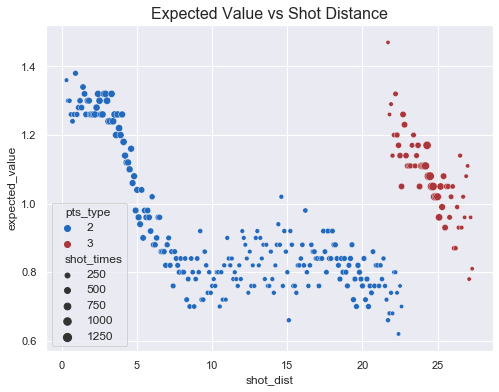

In [72]:
plt.figure(figsize=[8, 6]);
sns.scatterplot(x='shot_dist', y='expected_value', hue='pts_type', size='shot_times', 
            palette='vlag', data=new_hit_rate)
plt.title('Expected Value vs Shot Distance', fontsize=16);
plt.savefig('Expected Value vs Shot Distance.png')

In [73]:
# Shot Chart

In [74]:
# enter the the player's full namea and the season
player_full_name = input("enter the player's full name")

season = input("enter the season")

# Examples

# LeBron James
# James Harden
# Stephen Curry

# lebron james
# james harden
# stephen curry

# 2020-21

enter the player's full namelebron james
enter the season2019-20


In [85]:
# search player id by full name
def search_player_id(player_full_name):
    search = players.find_players_by_full_name(player_full_name)
    search = search[0]
    search_id = search['id']
    return search_id

search_id = search_player_id(player_full_name)

In [86]:
search_id

2544

In [87]:
season

'2019-20'

In [88]:
url_base = 'https://stats.nba.com/stats/shotchartdetail'

headers = {
        'Host': 'stats.nba.com',
        'Connection': 'keep-alive',
        'Accept': 'application/json, text/plain, */*',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
        'Referer': 'https://stats.nba.com/',
        "x-nba-stats-origin": "stats",
        "x-nba-stats-token": "true",
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'en-US,en;q=0.9',
    }

parameters = {
    'ContextMeasure': 'FGA',
    'LastNGames': 0,
    'LeagueID': '00',
    'Month': 0,
    'OpponentTeamID': 0,
    'Period': 0,
    'PlayerID': search_id,
    'SeasonType': 'Regular Season',
    'TeamID': 0,
    'VsDivision': '',
    'VsConference': '',
    'SeasonSegment': '',
    'Season': season,
    'RookieYear': '',
    'PlayerPosition': '',
    'Outcome': '',
    'Location': '',
    'GameSegment': '',
    'GameId': '',
    'DateTo': '',
    'DateFrom': ''
}


response = requests.get(url_base, params=parameters, headers=headers)
content = json.loads(response.content)

In [89]:
# transform contents into dataframe
results = content['resultSets'][0]
headers = results['headers']
rows = results['rowSet']
df = pd.DataFrame(rows)
df.columns = headers

# write to csv file
filename = "%s_%s.csv" % (player_full_name,season)
df.to_csv(filename, index=False)

In [90]:
df.head()

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME  \
0  Shot Chart Detail  0021900002              7       2544  LeBron James   
1  Shot Chart Detail  0021900002             21       2544  LeBron James   
2  Shot Chart Detail  0021900002             59       2544  LeBron James   
3  Shot Chart Detail  0021900002            129       2544  LeBron James   
4  Shot Chart Detail  0021900002            187       2544  LeBron James   

      TEAM_ID           TEAM_NAME  PERIOD  MINUTES_REMAINING  \
0  1610612747  Los Angeles Lakers       1                 11   
1  1610612747  Los Angeles Lakers       1                 10   
2  1610612747  Los Angeles Lakers       1                  6   
3  1610612747  Los Angeles Lakers       1                  3   
4  1610612747  Los Angeles Lakers       2                 10   

   SECONDS_REMAINING  ...         SHOT_ZONE_AREA  SHOT_ZONE_RANGE  \
0                 47  ...              Center(C)  Less Than 8 ft.   
1                  5  ...           Left Side(L)         8-16 ft.   
2                 58  ...              Center(C)          24+ ft.   
3                 51  ...              Center(C)         8-16 ft.   
4                 48  ...  Right Side Center(RC)          24+ ft.   

  SHOT_DISTANCE LOC_X LOC_Y SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG  GAME_DATE  \
0             2    -9    23                   1               1   20191022   
1            14  -144    41                   1               1   20191022   
2            25   -66   251                   1               0   20191022   
3            10     5   109                   1               0   20191022   
4            29   220   190                   1               1   20191022   

   HTM  VTM  
0  LAC  LAL  
1  LAC  LAL  
2  LAC  LAL  
3  LAC  LAL  
4  LAC  LAL  

[5 rows x 24 columns]

In [91]:
df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [92]:
# get the player's name from df
player = df.iat[0,4]
player

'LeBron James'

In [93]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

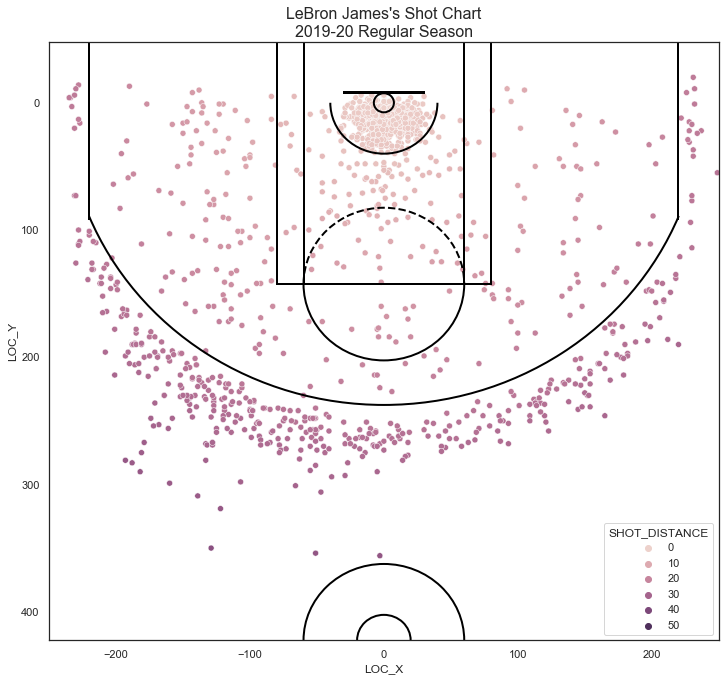

In [94]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
ax=sns.scatterplot(x=df.LOC_X, y=df.LOC_Y, hue=df.SHOT_DISTANCE)
draw_court(ax)
ax.set_title(player+"'s Shot Chart\n"+season+" Regular Season", fontsize=16)
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
sns.move_legend(ax, "lower right")
filename = "%s_%s.png" % (player_full_name,season)
plt.savefig(filename)
plt.show()